## Clusterisation

***Ici on va utiliser 20 ans de données préparer durant la phase précédente, pour clusteriser les stations françaises et par extension déterminer un ensemble de zones qui ont des conditions climatiques similaires.***

***Import des modules nécessaires***

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from functools import reduce

***On charge les 20 ans de données mensualisées sur l'Europe dans le premier dataframe et les données géographique sur les stations dans le second dataframe.***

In [2]:
df = pd.read_csv("../../../data/climat/clean_for_bi/ClimatFACT.csv")
df_stations = pd.read_csv("../../../data/climat/clean_for_bi/StationDIM.csv")
df

,DATE,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,SNDP,PRCP,FOG,RAIN,SNOW,HAIL,THUN
0,2000-01,60338099999,13.032258,20.000000,6.000000,9.786738,8.118929,33.521202,0.0,1.778000,0.0,3.0,0.0,0.0,3.0
1,2000-01,16754099999,10.648746,18.000000,4.000000,4.003584,21.495148,55.374798,0.0,26.791922,0.0,22.0,1.0,1.0,2.0
2,2000-01,16754399999,11.075269,17.000000,4.000000,4.740143,26.489574,68.338806,0.0,304.769530,0.0,12.0,0.0,0.0,2.0
3,2000-01,16746099999,9.236559,15.388889,0.000000,4.274194,13.800387,48.152000,0.0,1.836420,0.0,21.0,0.0,0.0,1.0
4,2000-01,16746433209,9.037635,21.000002,0.000000,5.645162,12.964000,44.633200,0.0,533.346700,1.0,21.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514131,2020-12,1001099999,-1.603943,4.222221,-10.611111,-3.888889,31.794659,86.673600,0.0,1.163320,1.0,11.0,22.0,1.0,0.0
514132,2020-12,1068099999,-0.116858,6.000000,-11.000000,-4.095785,26.445282,57.597202,0.0,355.564450,0.0,5.0,10.0,0.0,0.0
514133,2020-12,1074099999,-0.984127,5.000000,-12.111111,-4.539682,22.753143,61.116000,0.0,330.210170,0.0,7.0,8.0,0.0,0.0
514134,2020-12,1055099999,0.931900,8.000001,-10.000000,-2.983871,29.942657,84.266000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
df_stations

,STATION,NAME,COUNTRY,LATITUDE,LONGITUDE,ELEVATION
0,60338099999,MELILLA,Espagne,35.279816,-2.956256,47.54
1,16754099999,NIKOS KAZANTZAKIS,Grèce,35.339718,25.180298,35.05
2,16754399999,KARPATHOS,Grèce,35.421410,27.146008,20.11
3,16746099999,SOUDA,Grèce,35.531746,24.149677,149.35
4,16746433209,SOUDA BAY CRETE,Grèce,35.533329,24.150000,146.30
...,...,...,...,...,...,...
3070,4071099999,MANARBAKKI,Islande,66.199997,-17.100000,17.00
3071,74900599999,TIBENHAM AIRFIELD,Royaume-Uni,52.457001,1.162000,52.00
3072,26503099999,RUCAVA,Lettonie,56.150002,21.166666,19.00
3073,7121099999,BREHAT ISLAND,France,48.849998,-3.000000,36.00


***-On filtre les stations pour garder que les stations françaises. <br> -On merge le dataframe des données avec le dataframe des stations pour garder l'ensemble des données concernant la France (correspond à un right join en SQL ici).***

In [4]:
df_stations = df_stations[df_stations["COUNTRY"] == "France"]
df = pd.merge(left=df, right=df_stations, how="right", left_on="STATION", right_on="STATION")
df

,DATE,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,SNDP,PRCP,FOG,RAIN,SNOW,HAIL,THUN,NAME,COUNTRY,LATITUDE,LONGITUDE,ELEVATION
0,2000-01,7770099999,9.801075,15.000000,2.500000,4.876344,35.020720,125.936000,0.0,25.803862,0.0,9.0,0.0,0.0,0.0,CAP PERTUSATO,France,41.366665,9.166667,116.0
1,2000-02,7770099999,11.444445,15.500000,6.000000,7.024904,37.046387,100.008000,0.0,0.452120,0.0,6.0,0.0,0.0,0.0,CAP PERTUSATO,France,41.366665,9.166667,116.0
2,2000-03,7770099999,12.173835,16.722221,6.999999,7.989247,36.783108,101.860000,0.0,0.269240,0.0,10.0,0.0,0.0,0.0,CAP PERTUSATO,France,41.366665,9.166667,116.0
3,2000-04,7770099999,13.812963,20.500000,8.777778,10.233334,40.892160,107.230804,0.0,1.620520,0.0,11.0,0.0,0.0,2.0,CAP PERTUSATO,France,41.366665,9.166667,116.0
4,2000-05,7770099999,18.347670,25.222221,12.388889,14.177420,34.931110,84.821600,0.0,0.340360,3.0,6.0,0.0,0.0,0.0,CAP PERTUSATO,France,41.366665,9.166667,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42582,2020-07,7121099999,17.216846,23.888890,12.722223,NaN,18.902348,40.744000,0.0,0.185420,0.0,4.0,0.0,0.0,0.0,BREHAT ISLAND,France,48.849998,-3.000000,36.0
42583,2020-08,7121099999,18.614695,28.222223,12.388889,NaN,17.432697,51.856000,0.0,0.342900,0.0,5.0,0.0,0.0,1.0,BREHAT ISLAND,France,48.849998,-3.000000,36.0
42584,2020-09,7121099999,16.825926,24.722221,9.777777,NaN,17.692774,57.597202,0.0,0.403860,2.0,5.0,0.0,0.0,0.0,BREHAT ISLAND,France,48.849998,-3.000000,36.0
42585,2020-10,7121099999,13.163083,20.611110,8.500000,NaN,24.607704,64.820000,0.0,2.580640,0.0,19.0,0.0,1.0,1.0,BREHAT ISLAND,France,48.849998,-3.000000,36.0


***Pour clusteriser les données, on va utiliser l'algorithme k-means.<br> K-means est un algorithme qui se basent sur les distances entre les données. Chaque feature ou colonne représente une dimension dans un espace de N dimensions où N est le nombre total de features, chaque ligne de valeur ou entrée représente un point dans cette espace. Le but de k-means est de créer k groupes de points dont les membres sont le plus proche possible les uns des autres, tout en étant le plus loin possible des autres groupes. <br> De ce fait, les features avec un ordre de grandeur plus importants auront un effet plus important sur la création de ces groupes. <br> D'où la nécessiter de normaliser les données (c'est à dire les scaler dans le même ordre de grandeur). <br>La méthode la plus efficace lorsqu'on a des données sans outlier (valeurs extrêmes ou anormals) est de les scaler entre 0 et 1 où la valeur minimal sera assigné à 0 et la valeur maximal à 1. <br> Je regarde la distribution de mes données pour voir si je vais les normaliser ainsi.***

In [5]:
df.describe()

,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,SNDP,PRCP,FOG,RAIN,SNOW,HAIL,THUN,LATITUDE,LONGITUDE,ELEVATION
count,4.258700e+04,42587.000000,42587.000000,42587.000000,42112.000000,42356.000000,42343.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000
mean,7.601723e+09,12.658932,24.048797,2.213007,7.984414,13.921353,45.783742,2.465790,23.617862,3.191913,10.735189,0.645420,0.101604,0.825991,46.327805,2.398295,161.356765
std,4.666629e+09,5.993739,7.464713,6.378984,4.864418,5.960199,16.178692,42.167552,84.109981,3.873329,6.325143,1.774516,0.411234,1.478086,2.452958,3.446748,198.381776
min,7.002100e+09,-6.279762,2.388888,-31.000000,-12.070881,0.000000,3.518800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.366665,-5.600000,2.130000
25%,7.150100e+09,7.912031,17.777779,-2.277778,4.218453,10.108336,35.188000,0.000000,0.297180,0.000000,6.000000,0.000000,0.000000,0.000000,43.913887,-0.006439,52.120000
50%,7.330100e+09,12.512963,23.999998,1.722221,8.033334,12.803494,42.410800,0.000000,0.566420,2.000000,10.000000,0.000000,0.000000,0.000000,46.587746,2.370278,101.000000
75%,7.588100e+09,17.383423,30.222221,6.999999,12.141577,16.219936,53.522800,0.000000,0.998220,5.000000,15.000000,0.000000,0.000000,1.000000,48.538319,4.944275,179.000000
max,9.961710e+10,28.919355,45.500000,22.388891,22.968520,76.487600,161.864800,4097.528000,711.128900,30.000000,31.000000,21.000000,6.000000,16.000000,51.049999,9.533333,1565.000000


***En regardant ces valeurs, on voit que globalement les données sont propices à la normalisation hormis SNPD, PRCP, SNOW, HAIL et THUN. On voit que ces features sont très orientés vers leurs valeurs min avec des outliers en max. Je regarde le 9e décile de ces features***

In [6]:
df[["SNDP", "PRCP", "SNOW", "HAIL", "THUN"]].quantile(0.9)

SNDP     0.00000
PRCP    25.91308
SNOW     2.00000
HAIL     0.00000
THUN     3.00000
Name: 0.9, dtype: float64

***Durant le traitement des données, pour les colonnes SNDP et PRCP on a vu que les valeurs manquantes ou l'abscence de neige/pluie étaient tagués de la même manière. J'avais assigné la valeur 0 dans ces cas. On se rend compte que la large majorité de ces valeurs sont des 0 dont on est pas sûr si se sont de vrais 0 ou s'il n'y a pas eu de mesure tout simplement.<br>
Du fait du manque de confiance qu'on peut avoir en ces 2 colonnes, je décide de ne pas les utiliser.<br>
Pour SNOW, HAIL et THUN, je décide de les garder car même si leurs distributions ne me convient pas, on peut à priori faire confiance en ces valeurs et qu'elles peuvent apporter des informations utiles au modèles.***

***Par curisoité, voir les stations où il y a eu plus de 4 métres de neige enregistré en un mois***

In [7]:
df.loc[(df["SNDP"] > 4000), :]

,DATE,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,SNDP,PRCP,FOG,RAIN,SNOW,HAIL,THUN,NAME,COUNTRY,LATITUDE,LONGITUDE,ELEVATION
9216,2009-02,7560099999,-3.202222,7.111111,-11.222222,-6.193333,55.863728,122.04681,4097.528,1.41732,15.0,0.0,3.0,0.0,0.0,MONT AIGOUAL,France,44.116665,3.583333,1565.0


In [8]:
df = df.drop(["SNDP", "PRCP"], axis=1)

***Normalisation les données hormis les colonnes qui ne sont pas numériques***

In [9]:
column_to_not_normalise = ["DATE", "STATION", "COUNTRY", "NAME"]
column_to_normalise = [column for column in df.columns if column not in column_to_not_normalise]
df[column_to_normalise] = ((df[column_to_normalise] - df[column_to_normalise].min())
                    / (df[column_to_normalise].max() - df[column_to_normalise].min()))
df

,DATE,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,FOG,RAIN,SNOW,HAIL,THUN,NAME,COUNTRY,LATITUDE,LONGITUDE,ELEVATION
0,2000-01,7770099999,0.456853,0.292526,0.627471,0.483662,0.457861,0.773099,0.000000,0.290323,0.0,0.000000,0.0000,CAP PERTUSATO,France,0.000000,0.975771,0.072860
1,2000-02,7770099999,0.503541,0.304124,0.693028,0.544980,0.484345,0.609357,0.000000,0.193548,0.0,0.000000,0.0000,CAP PERTUSATO,France,0.000000,0.975771,0.072860
2,2000-03,7770099999,0.524263,0.332474,0.711759,0.572502,0.480903,0.621053,0.000000,0.322581,0.0,0.000000,0.0000,CAP PERTUSATO,France,0.000000,0.975771,0.072860
3,2000-04,7770099999,0.570830,0.420103,0.745057,0.636547,0.534625,0.654971,0.000000,0.354839,0.0,0.000000,0.1250,CAP PERTUSATO,France,0.000000,0.975771,0.072860
4,2000-05,7770099999,0.699661,0.529639,0.812695,0.749108,0.456690,0.513450,0.100000,0.193548,0.0,0.000000,0.0000,CAP PERTUSATO,France,0.000000,0.975771,0.072860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42582,2020-07,7121099999,0.667534,0.498711,0.818939,NaN,0.247130,0.235088,0.000000,0.129032,0.0,0.000000,0.0000,BREHAT ISLAND,France,0.772805,0.171806,0.021672
42583,2020-08,7121099999,0.707247,0.599227,0.812695,NaN,0.227915,0.305263,0.000000,0.161290,0.0,0.000000,0.0625,BREHAT ISLAND,France,0.772805,0.171806,0.021672
42584,2020-09,7121099999,0.656428,0.518041,0.763788,NaN,0.231316,0.341520,0.066667,0.161290,0.0,0.000000,0.0000,BREHAT ISLAND,France,0.772805,0.171806,0.021672
42585,2020-10,7121099999,0.552367,0.422680,0.739854,NaN,0.321721,0.387135,0.000000,0.612903,0.0,0.166667,0.0625,BREHAT ISLAND,France,0.772805,0.171806,0.021672


***Visualisation de la distribution suite à la normalisation***

In [10]:
df.describe()

,STATION,TEMP,MAX,MIN,DEWP,WDSP,MXSPD,FOG,RAIN,SNOW,HAIL,THUN,LATITUDE,LONGITUDE,ELEVATION
count,4.258700e+04,42587.000000,42587.000000,42587.000000,42112.000000,42356.000000,42343.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000,42587.000000
mean,7.601723e+09,0.538045,0.502421,0.622096,0.572364,0.182008,0.266915,0.106397,0.346296,0.030734,0.016934,0.051624,0.512338,0.528522,0.101881
std,4.666629e+09,0.170281,0.173151,0.119481,0.138827,0.077924,0.102173,0.129111,0.204037,0.084501,0.068539,0.092380,0.253317,0.227759,0.126934
min,7.002100e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.150100e+09,0.403186,0.356959,0.537981,0.464886,0.132157,0.200000,0.000000,0.193548,0.000000,0.000000,0.000000,0.263052,0.369619,0.031986
50%,7.330100e+09,0.533898,0.501289,0.612903,0.573760,0.167393,0.245614,0.066667,0.322581,0.000000,0.000000,0.000000,0.539182,0.526670,0.063262
75%,7.588100e+09,0.672266,0.645619,0.711759,0.691007,0.212060,0.315789,0.166667,0.483871,0.000000,0.000000,0.062500,0.740618,0.696758,0.113170
max,9.961710e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Comme je souhaites clusteriser les stations, la prochaine étape va être de grouper les données par STATION uniquement. Les donnés actuel sont groupés par STATION et par DATE(année/mois). Je vais aggréger l'ensembles des données sur 20 ans de chaque station en une moyenne mensuel.<br>Avant ça, je sauvegarde en mémoire les données géographique qui n'ont pas à être aggréger et on les effaces de notre dataframe principal.***

In [11]:
normalised_df_stations = df[["STATION", "COUNTRY", "NAME", "LATITUDE", "LONGITUDE", "ELEVATION"]].drop_duplicates("STATION")
# effacement pour l'aggregation des stats par mois sinon latitude longitude etc seront mensualises
df = df.drop(["COUNTRY", "NAME", "LATITUDE", "LONGITUDE", "ELEVATION"], axis=1)

***Convertion de la colonne DATE en type datetime
<br>Regroupement des données par STATION et par mois uniquement (création d'une moyenne mensuel des 20 années)***

In [12]:
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.groupby([df["STATION"], df["DATE"].dt.month.rename("MONTH")]).mean()
df

TEMP       MAX       MIN      DEWP      WDSP     MXSPD  \
STATION     MONTH                                                               
7002099999  1      0.329798  0.218827  0.517120  0.423144  0.302193  0.364578   
            2      0.331751  0.246257  0.538972  0.416343  0.288811  0.354330   
            3      0.381462  0.331124  0.580893  0.441136  0.266147  0.344417   
            4      0.458716  0.440142  0.627367  0.500185  0.229511  0.275146   
            5      0.533491  0.514605  0.683712  0.586761  0.235826  0.300473   
...                     ...       ...       ...       ...       ...       ...   
99617099999 8      0.838565  0.557990  0.949272  0.894313  0.290098  0.421345   
            9      0.772461  0.570232  0.879292  0.820889  0.349112  0.415205   
            10     0.699355  0.458441  0.833247  0.774449  0.369430  0.406140   
            11     0.592901  0.381443  0.769251  0.628778  0.428006  0.461988   
            12     0.527089  0.307023  0.729709  0.545215  0.447440  0.533041   

                        FOG      RAIN      SNOW      HAIL      THUN  
STATION     MONTH                                                    
7002099999  1      0.065079  0.457757  0.079365  0.047619  0.011905  
            2      0.069841  0.362519  0.068027  0.031746  0.000000  
            3      0.069841  0.310292  0.036281  0.015873  0.002976  
            4      0.076667  0.266129  0.004762  0.008333  0.012500  
            5      0.084127  0.310292  0.000000  0.007937  0.053571  
...                     ...       ...       ...       ...       ...  
99617099999 8      0.000000  0.000000  0.000000  0.000000  0.000000  
            9      0.000000  0.000000  0.000000  0.000000  0.000000  
            10     0.000000  0.000000  0.000000  0.000000  0.000000  
            11     0.000000  0.000000  0.000000  0.000000  0.000000  
            12     0.000000  0.000000  0.000000  0.000000  0.000000  

[2597 rows x 11 columns]

***J'unstack l'index au niveau de MONTH pour avoir seulement les STATION en index au niveau des lignes. Je créer de cette façon un multi-index au niveau des colonnes. <br> J'ai donc maintenant 132 features pour chaque STATION qui correspondent aux mesures météorologiques pour chaque mois.***

In [13]:
df = df.unstack(level=1)
df

TEMP                                                    \
MONTH              1         2         3         4         5         6    
STATION                                                                   
7002099999   0.329798  0.331751  0.381462  0.458716  0.533491  0.611905   
7003099999   0.326724  0.332245  0.382345  0.462242  0.544422  0.626452   
7005099999   0.307812  0.318340  0.379297  0.462423  0.545179  0.630113   
7009099999   0.337504  0.336800  0.395108  0.459258  0.546029  0.627228   
7010099999   0.343231  0.344667  0.391580  0.470019  0.554278  0.634481   
...               ...       ...       ...       ...       ...       ...   
7790099999   0.436882  0.443026  0.500502  0.577296  0.681013  0.802084   
7791099999   0.471271  0.476069  0.505472  0.601363  0.708955  0.792706   
99587099999  0.478288  0.437197  0.447689  0.478025  0.524925  0.626036   
99608099999  0.480280  0.464540  0.514399  0.567621  0.675490  0.800121   
99617099999  0.504050  0.489634  0.529117  0.549184  0.624156  0.741381   

                                                     ...      THUN            \
MONTH              7         8         9         10  ...        3         4    
STATION                                              ...                       
7002099999   0.667052  0.680888  0.628076  0.541373  ...  0.002976  0.012500   
7003099999   0.677832  0.680006  0.623824  0.536390  ...  0.006579  0.013889   
7005099999   0.681283  0.682481  0.610994  0.519923  ...  0.005952  0.034375   
7009099999   0.681371  0.687242  0.622506  0.538850  ...  0.000000  0.000000   
7010099999   0.692741  0.703480  0.645429  0.549967  ...  0.006250  0.011029   
...               ...       ...       ...       ...  ...       ...       ...   
7790099999   0.882489  0.884459  0.779790  0.673501  ...  0.112500  0.101974   
7791099999   0.898707  0.888267  0.804847  0.695328  ...  0.046875  0.031250   
99587099999  0.654602  0.681535  0.645507  0.576750  ...  0.000000  0.000000   
99608099999  0.839695  0.859427  0.768051  0.681502  ...  0.000000  0.000000   
99617099999  0.796460  0.838565  0.772461  0.699355  ...  0.000000  0.000000   

                                                                         \
MONTH              5         6         7         8         9         10   
STATION                                                                   
7002099999   0.053571  0.041667  0.050595  0.035714  0.017857  0.044643   
7003099999   0.052632  0.049342  0.046053  0.059028  0.027344  0.024306   
7005099999   0.056548  0.101190  0.095238  0.083333  0.029762  0.026786   
7009099999   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7010099999   0.023026  0.044643  0.035714  0.056548  0.029605  0.026316   
...               ...       ...       ...       ...       ...       ...   
7790099999   0.187500  0.215625  0.175000  0.209375  0.284375  0.203125   
7791099999   0.062500  0.089286  0.031250  0.085938  0.140625  0.132812   
99587099999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99608099999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99617099999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                 
MONTH              11        12  
STATION                          
7002099999   0.041667  0.011905  
7003099999   0.034722  0.013158  
7005099999   0.029762  0.020833  
7009099999   0.000000  0.000000  
7010099999   0.009868  0.009868  
...               ...       ...  
7790099999   0.206250  0.106250  
7791099999   0.125000  0.062500  
99587099999  0.000000  0.000000  
99608099999  0.000000  0.000000  
99617099999  0.000000  0.000000  

[217 rows x 132 columns]

***Je drop les STATIONS qui auraient des features manquantes, ces stations n'ont jamais émis l'équivalent d'une année complète de mesures ou des mesures en particulier leurs sont manquantes. Je perds 10 stations sur 217.***

In [14]:
df = df.dropna()
df

TEMP                                                    \
MONTH              1         2         3         4         5         6    
STATION                                                                   
7002099999   0.329798  0.331751  0.381462  0.458716  0.533491  0.611905   
7003099999   0.326724  0.332245  0.382345  0.462242  0.544422  0.626452   
7005099999   0.307812  0.318340  0.379297  0.462423  0.545179  0.630113   
7009099999   0.337504  0.336800  0.395108  0.459258  0.546029  0.627228   
7010099999   0.343231  0.344667  0.391580  0.470019  0.554278  0.634481   
...               ...       ...       ...       ...       ...       ...   
7785099999   0.489139  0.478579  0.531011  0.618466  0.710986  0.827231   
7790099999   0.436882  0.443026  0.500502  0.577296  0.681013  0.802084   
7791099999   0.471271  0.476069  0.505472  0.601363  0.708955  0.792706   
99608099999  0.480280  0.464540  0.514399  0.567621  0.675490  0.800121   
99617099999  0.504050  0.489634  0.529117  0.549184  0.624156  0.741381   

                                                     ...      THUN            \
MONTH              7         8         9         10  ...        3         4    
STATION                                              ...                       
7002099999   0.667052  0.680888  0.628076  0.541373  ...  0.002976  0.012500   
7003099999   0.677832  0.680006  0.623824  0.536390  ...  0.006579  0.013889   
7005099999   0.681283  0.682481  0.610994  0.519923  ...  0.005952  0.034375   
7009099999   0.681371  0.687242  0.622506  0.538850  ...  0.000000  0.000000   
7010099999   0.692741  0.703480  0.645429  0.549967  ...  0.006250  0.011029   
...               ...       ...       ...       ...  ...       ...       ...   
7785099999   0.905370  0.901966  0.818139  0.715929  ...  0.015625  0.008929   
7790099999   0.882489  0.884459  0.779790  0.673501  ...  0.112500  0.101974   
7791099999   0.898707  0.888267  0.804847  0.695328  ...  0.046875  0.031250   
99608099999  0.839695  0.859427  0.768051  0.681502  ...  0.000000  0.000000   
99617099999  0.796460  0.838565  0.772461  0.699355  ...  0.000000  0.000000   

                                                                         \
MONTH              5         6         7         8         9         10   
STATION                                                                   
7002099999   0.053571  0.041667  0.050595  0.035714  0.017857  0.044643   
7003099999   0.052632  0.049342  0.046053  0.059028  0.027344  0.024306   
7005099999   0.056548  0.101190  0.095238  0.083333  0.029762  0.026786   
7009099999   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7010099999   0.023026  0.044643  0.035714  0.056548  0.029605  0.026316   
...               ...       ...       ...       ...       ...       ...   
7785099999   0.011719  0.020833  0.014706  0.015625  0.035156  0.046875   
7790099999   0.187500  0.215625  0.175000  0.209375  0.284375  0.203125   
7791099999   0.062500  0.089286  0.031250  0.085938  0.140625  0.132812   
99608099999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99617099999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                 
MONTH              11        12  
STATION                          
7002099999   0.041667  0.011905  
7003099999   0.034722  0.013158  
7005099999   0.029762  0.020833  
7009099999   0.000000  0.000000  
7010099999   0.009868  0.009868  
...               ...       ...  
7785099999   0.062500  0.019531  
7790099999   0.206250  0.106250  
7791099999   0.125000  0.062500  
99608099999  0.000000  0.000000  
99617099999  0.000000  0.000000  

[207 rows x 132 columns]

***Je peux remerge ce dataframe avec le dataframe géographique que j'avais garder en mémoire (correspond à un full inner join en SQL ici). <br> Ou je décide de pas utiliser la LATITUDE, la LONGITUDE et l'ELEVATION.***

In [15]:
#df = pd.merge(left=df, right=normalised_df_stations, how="inner", left_on="STATION", right_on="STATION")
#df
# si je souhaites applatir le multi-index
#df.columns = df.columns.to_flat_index()

***Finalement, l'étape de clusteristion.<br> Création d'un dataframe df_results qui va servir stocker les résultats (le numéro de cluster assigné à chaque station).
<br>Création d'un dictionnaire Python pour stocker les scores des clusterisations en fonction de K (le nombre de groupes que l'algorithme doit créer).
<br>Boucle pour faire 9 clusterisations en faisant varier K de 2 à 10.***

In [16]:
#df_results = df[["STATION"]].copy()
# ou si STATION est en index
df_results = pd.DataFrame(index=df.index)
k_scores = {"k":[], "inertia":[], "silhouette":[]}
for k in range(2, 11):
    K_means = KMeans(k, random_state=0).fit(df)       
    name_colonne = k
    df_results.loc[:,name_colonne] = K_means.labels_ + 1

    k_scores["k"].append(k)
    # Sum of squared distances of samples to their closest cluster center
    k_scores["inertia"].append(K_means.inertia_)
    # Silhouete_score
    k_scores["silhouette"].append(silhouette_score(df, K_means.labels_))
    
df_results

,2,3,4,5,6,7,8,9,10
STATION,,,,,,,,,
7002099999,1,3,3,1,5,1,4,7,9
7003099999,1,1,3,1,5,7,5,4,7
7005099999,2,2,2,2,4,4,2,6,1
7009099999,2,2,2,1,4,4,2,6,1
7010099999,1,3,3,1,5,1,4,7,9
...,...,...,...,...,...,...,...,...,...
7785099999,1,3,1,4,2,5,8,9,2
7790099999,1,1,3,3,3,6,3,2,3
7791099999,1,3,3,4,3,6,3,9,3


In [17]:
scores_df = pd.DataFrame.from_dict(k_scores, orient="columns")
scores_df

,k,inertia,silhouette
0,2,92.577978,0.347249
1,3,77.599971,0.310673
2,4,68.194961,0.298085
3,5,60.760273,0.298168
4,6,54.469872,0.223880
5,7,50.372231,0.198276
6,8,45.613791,0.202842
7,9,43.664313,0.191424
8,10,41.895218,0.179600


***Visualisation des scores pour déterminer le K optimal.
<br>Dans le premier graphique, "inertia" correspond à la somme des distance au carré entre les points et le centre du cluster qui leurs est assigné. Plus cette valeur est petite plus les clusters sont denses. Le but de la courbe est de trouver le nombre K minimal à partir duquel la baisse de la valeur devient minime. Cette méthode s'appelle la méthode Elbow. Ici, il semble ne pas vraiment avoir de K optimal, hormis peut être 8.***

<AxesSubplot:xlabel='k'>

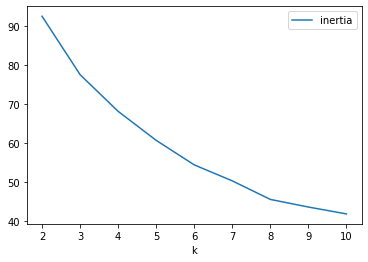

In [18]:
scores_df.plot(x="k", y="inertia")

***Dans le deuxièmre graphique, on mesure le "silhouette score" qui correspond à un score de similiraté entre les membres d'un même cluster. On choisit K en fonction du score le plus élevé. Ici, le K optimal se situerai entre 2 et 5.
<br>
<br>De plus ample visualisations sur les scores et résultats des clusterisations sont disponible dans le rapport Power BI.***

<AxesSubplot:xlabel='k'>

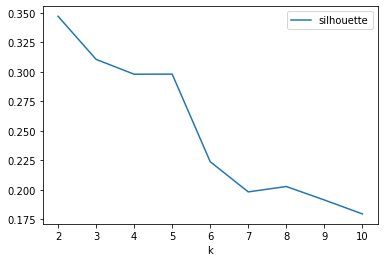

In [19]:
scores_df.plot(x="k", y="silhouette")

***Classe pour gérer les clusterisations après avoir refactoriser mon code pour moduler et réitérer plus facilement.
<br>Ajout d'une option pour choisir le pays à clusteriser ou l'ensemble de l'Europe si pas de pays choisis.
<br>Ajout d'une option pour affecter des poids aux features.***

In [20]:
class ClustersHandler:
    def __init__(self, df: pd.DataFrame, df_stations: pd.DataFrame, country:str=None, weights:dict=None):
        if country is not None:
            df_stations = df_stations[df_stations["COUNTRY"] == country]
        self.df = pd.merge(left=df, right=df_stations, how="right", left_on="STATION", right_on="STATION")

        self._normalise()
        if weights is not None:
            self._apply_weights(weights)

        normalised_df_stations = self.df[["STATION", "COUNTRY", "NAME", "LATITUDE", "LONGITUDE", "ELEVATION"]].drop_duplicates("STATION")
        # effacement pour l'aggregation des stats par mois sinon latitude longitude etc seront mensualises
        self.df = self.df.drop(["COUNTRY", "NAME", "LATITUDE", "LONGITUDE", "ELEVATION"], axis=1)

        self.df["DATE"] = pd.to_datetime(self.df["DATE"])
        self.df = self.df.groupby([self.df["STATION"], self.df["DATE"].dt.month.rename("MONTH")]).mean()
        self.df = self.df.unstack(level=1)
        self.df = self.df.dropna()
        # refusion avec les donnes stations dont lat long elevation normalise
        self.df = pd.merge(left=self.df, right=normalised_df_stations, how="inner", left_on="STATION", right_on="STATION")

        self._k_scores = None

    def _normalise(self):
        column_to_not_normalise = ["DATE", "STATION", "COUNTRY", "NAME"]
        column_to_normalise = [column for column in self.df.columns if column not in column_to_not_normalise]
        self.df[column_to_normalise] = ((self.df[column_to_normalise] - self.df[column_to_normalise].min())
                            / (self.df[column_to_normalise].max() - self.df[column_to_normalise].min()))

    def _apply_weights(self, weights:dict):
        for col_name, weight in weights.items():
            self.df[col_name] = self.df[col_name] * weight

    def get_clusters(self, clusters_name: str, list_columns: list, k_clusters_min: int=2, k_clusters_max: int=10) -> pd.DataFrame:
        '''list_columns: nom des colonnes de niveau 1 dans la hiérarchie, le niveau 2 étant le numéro du mois
        retourne un dataframe contenant les résultats des clusterisations'''
        # init du df résultats avec les id des stations qui seront clusterises
        df_results = self.df[["STATION"]].copy()
        # contiendra la liste de tuple des colonnes (niveau1, niveau2)
        list_columns_final = []
        for column in list_columns:
            if column in self.df.columns:
                list_columns_final.append(column)
            else:
                for n_month in range(1, 13):
                    list_columns_final.append((column, n_month))
        # initialisation du dictionnaire qui contiendra les scores des clusterisations pour chaque K
        k_range = range(k_clusters_min, k_clusters_max + 1)
        k_scores = {"K": list(k_range), f"{clusters_name}_inertia": [], f"{clusters_name}_silhouette": []}
        # plusieurs clusterisations en variant le K et ajout des résultats dans le df_results
        for k in k_range:
            K_means = KMeans(k, random_state=0).fit(self.df[list_columns_final])  
            print(self.df[list_columns_final])     
            name_colonne = k
            df_results.loc[:,name_colonne] = K_means.labels_ + 1

            # Sum of squared distances of samples to their closest cluster center
            k_scores[f"{clusters_name}_inertia"].append(K_means.inertia_)
            # Silhouete_score
            k_scores[f"{clusters_name}_silhouette"].append(silhouette_score(self.df[list_columns_final], K_means.labels_))
        # sauvegarde des scores en tant que membre de la classe et retour des clusterisations en output
        # si des scores sont deja présent (créer durant la même session de clusterisation à partir de la même 
        # instance de la classe ClusterHandler), on les réunit
        if self._k_scores is not None:
            last_scores = pd.DataFrame.from_dict(k_scores, orient="columns")
            self._k_scores = pd.merge(left=self._k_scores, right=last_scores, on="K", how="outer")
        else:
            self._k_scores = pd.DataFrame.from_dict(k_scores, orient="columns")      
        return df_results

    def get_k_scores(self) -> pd.DataFrame:
        return self._k_scores

***Fonction qui effectue un ensemble de clusterisations en utilisant des colonnes différentes. (54 clusterisations sont générés ici) <br> Enregistrement des résultats pour l'analyse sur Power BI.***

In [21]:
def create_clusters():
    df = pd.read_csv("data/climat/clean_for_bi/ClimatFACT.csv")
    df_stations = pd.read_csv("data/climat/clean_for_bi/StationDIM.csv")

    clustering = ClustersHandler(df, df_stations, "France")

    clusters1 = clustering.get_clusters("Cluster_TEMP", ["TEMP"], 2, 10)
    clusters1 = clusters1.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_TEMP")

    clusters2 = clustering.get_clusters("Cluster_TEMP+", ["TEMP", "MIN", "MAX", "DEWP"])
    clusters2 = clusters2.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_TEMP+")

    clusters3 = clustering.get_clusters("Cluster_WIND", ["WDSP", "MXSPD"])
    clusters3 = clusters3.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_WIND")

    clusters4 = clustering.get_clusters("Cluster_FRSHT", ["FOG", "RAIN", "SNOW", "HAIL", "THUN"])
    clusters4 = clusters4.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_FRSHT")

    clusters5 = clustering.get_clusters("Cluster_ALL", ["TEMP", "MIN", "MAX", "DEWP", "WDSP", "MXSPD", 
                                        "FOG", "RAIN", "SNOW", "HAIL", "THUN"])
    clusters5 = clusters5.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_ALL")

    clusters6 = clustering.get_clusters("Cluster_ALL+GEO", ["TEMP", "MIN", "MAX", "DEWP", "WDSP", "MXSPD", 
                "FOG", "RAIN", "SNOW", "HAIL", "THUN", "ELEVATION", "LATITUDE", "LONGITUDE"])
    clusters6 = clusters6.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_ALL+GEO")

    all_clusters = [clusters1, clusters2, clusters3, clusters4, clusters5, clusters6]
    final_df = reduce(lambda left, right: pd.merge(left=left, right=right, on=["STATION", "K"], 
                                                    how="inner"), all_clusters)
    final_df.to_csv("data/climat/clean_for_bi/Clusters.csv", index=False)
    k_scores = clustering.get_k_scores()
    k_scores.to_csv("data/climat/clean_for_bi/k_scores.csv", index=False)

***Fonction où j'effectue des clusterisations en attribuant des poids aux features.
<br>Les poids sont des coefficients par lequel je multiplie les valeurs des colonnes correspondantes.
<br>Comme dit plutôt, comme k-means est un algorithme basé sur les distances, en multipliant certains axes(dimensions/features) je multiplie leurs importances dans le calcul des distances total.
<br>Ici, je donne 3 fois plus d'importance à la Température moyenne qu'au nombre de jours de neige par exemple.***

In [22]:
def create_optimal_cluster():
    df = pd.read_csv("data/climat/clean_for_bi/ClimatFACT.csv")
    df_stations = pd.read_csv("data/climat/clean_for_bi/StationDIM.csv")

    weights = {"TEMP":3, "MIN":2.5, "MAX":2.5, "DEWP":2, "WDSP":1.5, "MXSPD":1.5, 
                "FOG":1, "RAIN":2, "SNOW":1, "HAIL":1, "THUN":1.5, "ELEVATION":1, "LATITUDE":1, "LONGITUDE":1}
    
    clustering = ClustersHandler(df, df_stations, "France", weights)
    
    clusters = clustering.get_clusters("Cluster_ALL", [key for key in weights.keys()], 2, 10)
    clusters = clusters.melt(id_vars=["STATION"], var_name="K", value_name="Cluster_ALL")

    clusters.to_csv("data/climat/clean_for_bi/Clusters_opt.csv", index=False)

***De plus, l'attribution de ces poids peut être justifiée, une citation de Wikipédia concernant les différents climats :*** « la réunion des phénomènes calorifiques, aqueux, lumineux, aériens, électriques, etc. qui impriment à ce pays un caractère météorologique défini, différent de celui d'un autre pays, placé sous la même latitude et dans les mêmes conditions géologiques. Selon que l'un de ces phénomènes domine, on dit que le climat est chaud, froid ou tempéré, sec ou humide, calme ou venteux.
On considère toutefois la chaleur comme exerçant la plus grande influence : viennent ensuite les quantités d'eau tombée dans les diverses saisons de l'année, l'humidité ou la sécheresse de l'air, les vents dominants, le nombre et la répartition des orages dans le cours de l'année; la sérénité ou la nébulosité de l'air; la nature du sol et celle de la végétation qui le recouvre, selon qu'elle est spontanée ou le résultat de la culture. »